### Wildfire Prediction Challenge

#### Aim of Project: Create a machine learming model capable of predicting the burned area in different  Zimbabwe loacions over 2014 to 2016


> Data Scientist: Ahaji Victor Kelechi




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Loading Data

In [ ]:
df_1= pd.read_csv("/content/Train.csv")
# View raw train data.
df_1.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [ ]:
df_1.set_index("ID")

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
ID,,,,,,,,,,,,,,,,,,,,,
0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,1692,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,1859,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,1677,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,1061,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,1714,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528_2013-12-01,-22.108835,30.737029,0.0,1210,324,142,1535,127,6,51,...,0.0,0.0,0.000000,0.0,0.008768,0.000000,0.991232,0.000000,0.0,0.132015
529_2013-12-01,-22.108835,30.987029,0.0,1295,195,126,1490,136,7,61,...,0.0,0.0,0.000000,0.0,0.216560,0.000000,0.783440,0.000000,0.0,0.124280
530_2013-12-01,-22.108835,31.237029,0.0,1254,272,111,1527,132,7,29,...,0.0,0.0,0.000000,0.0,0.392621,0.000000,0.607379,0.000000,0.0,0.115464


### Data Exploration

In [ ]:
# Understanding data characteristics
df_1.info() # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [ ]:
# Summary statistic of our data
df_1.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,...,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,...,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,...,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,...,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


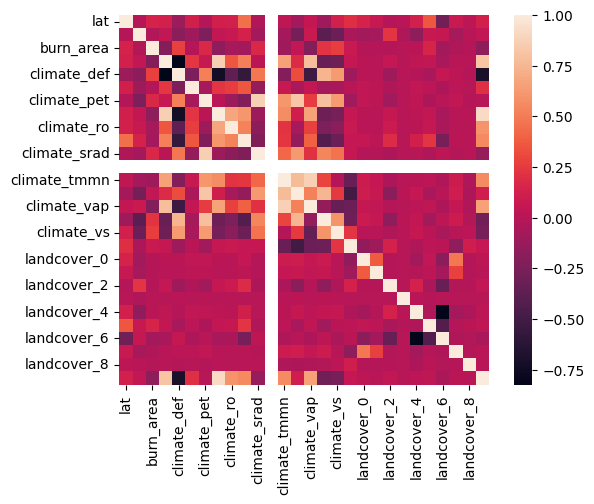

In [ ]:
# Understand the correlation between variables and target
corr_matrix = df_1.drop("ID",axis=1).corr()

sns.heatmap(corr_matrix, square=True);

In [ ]:
df_2 = df_1.drop(columns=["climate_swe", "climate_def", "climate_pet", "precipitation"])

### Data Spliting

In [ ]:
features = df_2.drop(columns=["ID", "burn_area"],axis=1).columns
target = "burn_area"

X = df_2[features]
y = df_2[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state = 24)

### Model Building

In [ ]:
model = Pipeline([("scaler", StandardScaler()),
                  ("svm",SVR(kernel="linear",C=10,epsilon=0.1,gamma="scale"))])

model.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVR(C=10, kernel='linear'))])

In [ ]:
# make prediction
y_pred = model.predict(X_test)

In [ ]:
# model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.09619515097153937


In [ ]:
Test_data = pd.read_csv("/content/Test.csv").set_index("ID")
Test_data.head()

,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
ID,,,,,,,,,,,,,,,,,,,,,
0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,1974,...,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243
1_2014-01-01,-15.858835,29.487029,1118,98,-405,1216,117,6,330,1973,...,0.0,0.000000,0.000000,0.0,0.406436,0.000446,0.593118,0.000000,0.0,0.421489
2_2014-01-01,-15.858835,29.737029,1067,137,-468,1204,111,6,194,1958,...,0.0,0.000000,0.000000,0.0,0.254791,0.000000,0.745209,0.000000,0.0,0.419122
3_2014-01-01,-15.858835,29.987029,969,187,-533,1156,101,5,78,1954,...,0.0,0.000000,0.000000,0.0,0.219340,0.182153,0.598507,0.000000,0.0,0.404596
4_2014-01-01,-15.858835,30.237029,927,270,-505,1197,96,5,139,1939,...,0.0,0.000000,0.000000,0.0,0.220239,0.097748,0.682013,0.000000,0.0,0.371100


In [ ]:
predictions = pd.Series(model.predict(Test_data.drop(columns=["climate_swe", "climate_def","climate_pet", "precipitation"])),index=Test_data.index)

predictions.to_csv("submissions1.csv")